### Import Libraries


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize

2025-03-04 22:02:50.261845: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load and Preprocess Data for BND and SPY


In [6]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'
data = yf.download(tickers, start=start_date, end=end_date)
close_prices = data['Close']

# Split the data into training and testing sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Separate the training and testing data for each asset
train_tsla, test_tsla = train['TSLA'], test['TSLA']
train_bnd, test_bnd = train['BND'], test['BND']
train_spy, test_spy = train['SPY'], test['SPY']

[*********************100%***********************]  3 of 3 completed


### Forecast BND and SPY Prices

* #### Forecast BND Prices using ARIMA

In [7]:
# Train the ARIMA model for BND
arima_model_bnd = ARIMA(train_bnd, order=(5, 1, 0))
arima_model_fit_bnd = arima_model_bnd.fit()

# Forecast for the next 12 months
arima_forecast_bnd = arima_model_fit_bnd.forecast(steps=365)

/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

* #### Forecast SPY Prices using ARIMA


In [8]:
# Train the ARIMA model for SPY
arima_model_spy = ARIMA(train_spy, order=(5, 1, 0))
arima_model_fit_spy = arima_model_spy.fit()

# Forecast for the next 12 months
arima_forecast_spy = arima_model_fit_spy.forecast(steps=365)

/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

In [10]:
# Train the ARIMA model for TSLA
arima_model_tsla = ARIMA(train_tsla, order=(5, 1, 0))
arima_model_fit_tsla = arima_model_tsla.fit()

# Forecast for the next 12 months
arima_forecast_tsla = arima_model_fit_tsla.forecast(steps=365)

/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

In [11]:
# Train the ARIMA model for BND
arima_model_bnd = ARIMA(train_bnd, order=(5, 1, 0))
arima_model_fit_bnd = arima_model_bnd.fit()

# Forecast for the next 12 months
arima_forecast_bnd = arima_model_fit_bnd.forecast(steps=365)

/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

In [12]:
# Train the ARIMA model for SPY
arima_model_spy = ARIMA(train_spy, order=(5, 1, 0))
arima_model_fit_spy = arima_model_spy.fit()

# Forecast for the next 12 months
arima_forecast_spy = arima_model_fit_spy.forecast(steps=365)

/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

### Combine Forecasted Data into One DataFrame


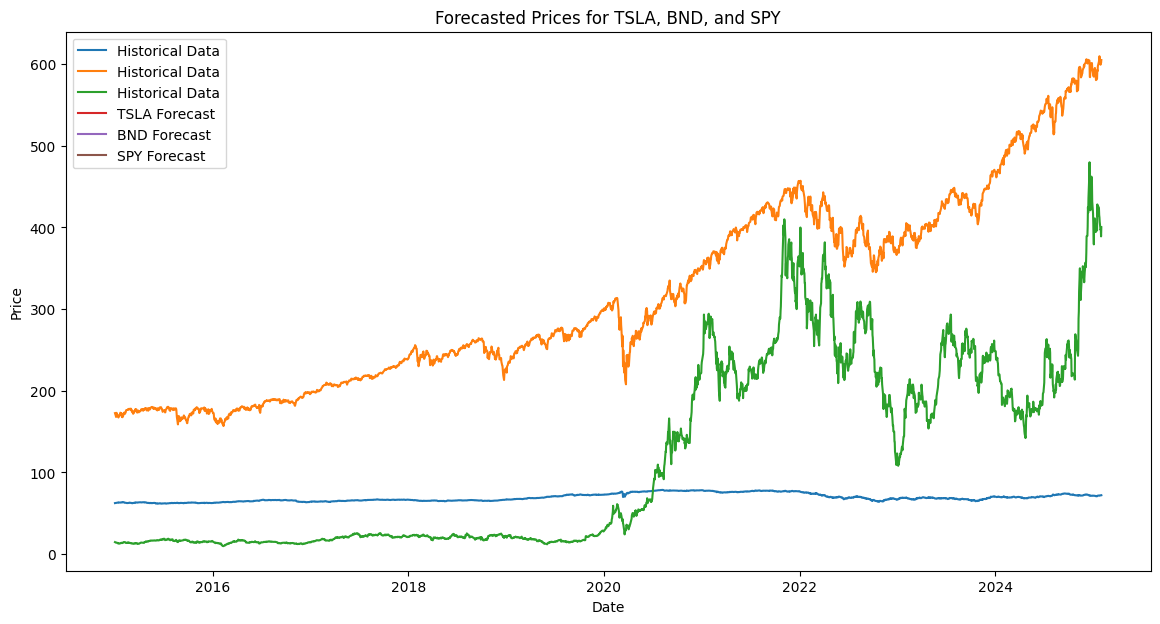

In [14]:
# Combine the forecasted data into one DataFrame
forecast_dates = pd.date_range(start=test.index[-1], periods=365, freq='D')
forecast_df = pd.DataFrame({
    'TSLA': arima_forecast_tsla,
    'BND': arima_forecast_bnd,
    'SPY': arima_forecast_spy
}, index=forecast_dates)

# Plot the forecasted data
plt.figure(figsize=(14, 7))
plt.plot(close_prices, label='Historical Data')
plt.plot(forecast_df['TSLA'], label='TSLA Forecast')
plt.plot(forecast_df['BND'], label='BND Forecast')
plt.plot(forecast_df['SPY'], label='SPY Forecast')
plt.title('Forecasted Prices for TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

* #### Compute Annual Return and Covariance Matrix


In [15]:
# Compute daily returns
returns = forecast_df.pct_change().dropna()

# Compute annual return
annual_returns = returns.mean() * 252

# Compute covariance matrix
cov_matrix = returns.cov() * 252

/tmp/ipykernel_24123/1176343287.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = forecast_df.pct_change().dropna()
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/

* #### Define Portfolio Weights and Compute Metrics


In [16]:
# Define initial portfolio weights
weights = np.array([0.4, 0.3, 0.3])

# Compute portfolio return
portfolio_return = np.dot(weights, annual_returns)

# Compute portfolio volatility
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Compute Sharpe Ratio
risk_free_rate = 0.01
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print(f'Portfolio Return: {portfolio_return}')
print(f'Portfolio Volatility: {portfolio_volatility}')
print(f'Sharpe Ratio: {sharpe_ratio}')

Portfolio Return: nan
Portfolio Volatility: nan
Sharpe Ratio: nan
